In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from textblob import TextBlob
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.manifold import TSNE
import time



# Load the data

In [2]:
year='../data/datasetsFinalaizedForEDA/datasets_top50-2019.csv'
df_new=pd.read_csv('../data/intermediate datasets-ToBeUsedForRanking/df_2019_new.csv')
new_dataframe_name="../data/intermediate datasets-ToBeUsedForRanking/df_2019_new.csv"



In [3]:
def load(year):
    df=pd.read_csv(year,encoding='latin-1')
    return df

#df_2019=pd.read_csv('../data/datasets_top50-2019.csv',encoding='latin-1')


In [4]:
load(year)

,id,name,popularity,track.track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artists
0,6v3KW9xbzN5yKLt9YKDYA2,SeÃ±orita,83,1,0.759,0.548,9,-6.049,0,0.0290,0.03920,0.000000,0.0828,0.749,116.967,190800,4,Shawn Mendes
1,2Fxmhks0bxGSBdJ92vM42m,bad guy,90,2,0.701,0.425,7,-10.965,1,0.3750,0.32800,0.130000,0.1000,0.562,135.128,194088,4,Billie Eilish
2,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,83,12,0.755,0.522,2,-4.368,1,0.0575,0.53300,0.000000,0.0685,0.925,89.960,157560,4,Post Malone
3,6ocbgoVGwYJhOv1GgI9NsF,7 rings,86,10,0.778,0.317,1,-10.732,0,0.3340,0.59200,0.000000,0.0881,0.327,140.048,178627,4,Ariana Grande
4,2YpeDb67231RjR0MgVLzsG,Old Town Road - Remix,85,1,0.878,0.619,6,-5.560,1,0.1020,0.05330,0.000000,0.1130,0.639,136.041,157067,4,Lil Nas X
5,0hVXuCcriWRGvwMV1r5Yn9,I Don't Care (with Justin Bieber),80,6,0.798,0.676,6,-5.041,1,0.0442,0.09020,0.000000,0.0894,0.843,101.956,219947,4,Ed Sheeran
6,7xQAfvXzm3AkraOtGPWIZg,Wow.,84,17,0.829,0.539,11,-7.359,0,0.2080,0.13600,0.000002,0.1030,0.388,99.960,149547,4,Post Malone
7,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,91,4,0.501,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,182161,4,Lewis Capaldi
8,5w9c2J52mkdntKOmRLeM2m,Con Calma,83,1,0.737,0.860,8,-2.652,0,0.0593,0.11000,0.000002,0.0574,0.656,93.989,193227,4,Daddy Yankee
9,2VxeLyX666F8uXCJ0dZF8B,Shallow,85,12,0.572,0.385,7,-6.362,1,0.0308,0.37100,0.000000,0.2310,0.323,95.799,215733,4,Lady Gaga


In [5]:
df=load(year)

# data properties

In [6]:
def data_properties(year):
    print("properties for year are as follows :\n")
    print("column details:\n")
    print(year.columns)
    print("shape:\n")
    print(year.shape)
    print("info about dataset:\n")
    print(year.info())
    print("\n")


In [7]:
data_properties(df)

properties for year are as follows :

column details:

Index(['id', 'name', 'popularity', 'track.track_number', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'artists'],
      dtype='object')
shape:

(50, 18)
info about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  50 non-null     object 
 1   name                50 non-null     object 
 2   popularity          50 non-null     int64  
 3   track.track_number  50 non-null     int64  
 4   danceability        50 non-null     float64
 5   energy              50 non-null     float64
 6   key                 50 non-null     int64  
 7   loudness            50 non-null     float64
 8   mode                50 non-n

### Initial calculations on data

#### checking if any value is null in the data 

In [8]:
def checkfornull(year):
    print("cheking for null values......")
    print(year.columns[year.isnull().any()])
    output=year.isnull().sum()
    return output 

In [9]:
checkfornull(df)

cheking for null values......
Index([], dtype='object')


id                    0
name                  0
popularity            0
track.track_number    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_ms           0
time_signature        0
artists               0
dtype: int64

#### convert the non float data to float data type

In [10]:
# in the data we obsrve that all the data is not in float .So , in order to maintain a symetry,we will 
# convert the non float data to float data type

def float_conversion(column,value):
    column= pd.to_numeric(value, downcast="float")
    return column


In [11]:
def execute_float_conversion():
    float_conversion(df.mode,df["mode"])
    float_conversion(df.duration_ms,df["duration_ms"])
    float_conversion(df.time_signature,df["time_signature"])
    return df.head()


In [12]:
execute_float_conversion()

,id,name,popularity,track.track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artists
0,6v3KW9xbzN5yKLt9YKDYA2,SeÃ±orita,83,1,0.759,0.548,9,-6.049,0,0.0290,0.0392,0.00,0.0828,0.749,116.967,190800,4,Shawn Mendes
1,2Fxmhks0bxGSBdJ92vM42m,bad guy,90,2,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.13,0.1000,0.562,135.128,194088,4,Billie Eilish
2,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,83,12,0.755,0.522,2,-4.368,1,0.0575,0.5330,0.00,0.0685,0.925,89.960,157560,4,Post Malone
3,6ocbgoVGwYJhOv1GgI9NsF,7 rings,86,10,0.778,0.317,1,-10.732,0,0.3340,0.5920,0.00,0.0881,0.327,140.048,178627,4,Ariana Grande
4,2YpeDb67231RjR0MgVLzsG,Old Town Road - Remix,85,1,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.00,0.1130,0.639,136.041,157067,4,Lil Nas X


## Sequential column analysis

In [13]:
#Sequential column analysis: for in depth understanding 

In [14]:
def understand_feature(feature):
    return feature.describe()


#### danceability

In [15]:
#The higher the value, the easier it is to dance to this song.
def print_overall_dancebility_features():
    print("overall danceability feature\n")
    return understand_feature(df["danceability"])


In [16]:
print_overall_dancebility_features()

overall danceability feature



count    50.000000
mean      0.719400
std       0.130358
min       0.351000
25%       0.657500
50%       0.743000
75%       0.814500
max       0.907000
Name: danceability, dtype: float64

In [17]:
def top_10_dancebility():
    print("top 10  danceability feature\n")
    return understand_feature(df["danceability"].head(10))



In [18]:
top_10_dancebility()

top 10  danceability feature



count    10.000000
mean      0.730800
std       0.114692
min       0.501000
25%       0.710000
50%       0.757000
75%       0.793000
max       0.878000
Name: danceability, dtype: float64

In [19]:
#sorting out more danceble songs 
def sorting_dancebility():
    df['dancebility_new']=df['danceability']
    df.loc[df['danceability']>=0.6000,'dancebility_new']='1'
    df.loc[(df['danceability']<0.6000),'dancebility_new']='0'

    return (df['dancebility_new'].value_counts())

In [20]:
sorting_dancebility()

1    41
0     9
Name: dancebility_new, dtype: int64

In [21]:
print("top 10  energy  feature\n")
understand_feature(df["energy"].head(10))

top 10  energy  feature



count    10.000000
mean      0.529600
std       0.160433
min       0.317000
25%       0.410000
50%       0.530500
75%       0.601250
max       0.860000
Name: energy, dtype: float64

#### In Depth BPM

Understanding beats per minute i.e tempo of the song
here we do classification of the tempo on the bases of beats per min 
REf:https://www.musical-u.com/learn/rhythm-tips-for-identifying-music-genres-by-ear/

And creating a new feature :tempo_rate 
tempo_rate:This classifies the song on the basis of bpm like:
    - very slow
    - slow
    - moderate
    - fast
    - very fast


In [22]:
def tempo_rate():
    df['tempo_rate']=df['tempo']
    return df['tempo_rate']

In [23]:
tempo_rate()

0     116.967
1     135.128
2      89.960
3     140.048
4     136.041
5     101.956
6      99.960
7     109.891
8      93.989
9      95.799
10    100.015
11    136.041
12    126.899
13    106.966
14    137.958
15    133.002
16    102.998
17    120.046
18    135.998
19    135.984
20     82.642
21     92.979
22     98.078
23    169.999
24    123.984
25    150.231
26     82.014
27     95.881
28    179.974
29    115.284
30    155.008
31     86.003
32     98.994
33    176.169
34     97.062
35    158.087
36     89.949
37     71.105
38     91.987
39    105.027
40    123.935
41    176.036
42    102.211
43    124.080
44    100.001
45    145.038
46     92.010
47    171.993
48    150.073
49    159.801
Name: tempo_rate, dtype: float64

In [24]:
def cateogarise_tempo_rate():
    df.loc[df['tempo']<65,'tempo_rate']='very slow'
    df.loc[(df['tempo']>=66) & (df['tempo']<=76),'tempo_rate']='slow'
    df.loc[(df['tempo']>=77) & (df['tempo']<=108),'tempo_rate']='moderate'
    df.loc[(df['tempo']>=109) & (df['tempo']<=168),'tempo_rate']='fast'
    df.loc[df['tempo']>168,'tempo_rate']='very fast'


In [25]:
cateogarise_tempo_rate()

In [26]:
def describe_songs_per_tempo_rate():
    print("Tempo Rate\tCount\n")
    print(df['tempo_rate'].value_counts())
    print("\n")
    df.head()

In [27]:
describe_songs_per_tempo_rate()

Tempo Rate	Count

fast         22
moderate     22
very fast     5
slow          1
Name: tempo_rate, dtype: int64




In [28]:
def barplot_temporate():
    sns.barplot(x=pd.DataFrame(df['tempo_rate'].value_counts()).tempo_rate, 
                y=pd.DataFrame(df['tempo_rate'].value_counts()).index
               )
    plt.title('music tempo', fontsize=17);

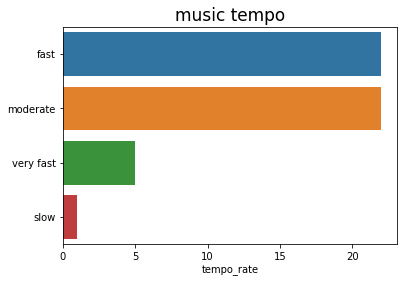

In [29]:
barplot_temporate()

sort the songs on the bases of important parametes like :

In [30]:
def sort_imp_parameters():
    return df[['name','artists','danceability','valence','tempo','tempo_rate','energy']].sort_values(by=["danceability","energy","valence"],ascending=False).head(10)

As we can see that these features collectively couldn't generate the sorted manner of artist as expected.We need to change our approach and include more features 


#### Analysing top artists
Analysing Top artists will give us a better idea about the feature importance 

In [31]:
#count the value:in terms on songs per year for an  artist
def songs_per_artist():
    print("Artist\t\tSongs\n")
    print(df["artists"].value_counts().head(20))

In [32]:
songs_per_artist()

Artist		Songs

Post Malone       5
Billie Eilish     4
Ariana Grande     3
Shawn Mendes      2
Bad Bunny         2
Lil Nas X         2
Anuel AA          2
Ed Sheeran        2
Lunay             1
Avicii            1
J. Cole           1
Halsey            1
Lauv              1
Daddy Yankee      1
DJ Snake          1
Jonas Brothers    1
Travis Scott      1
Mabel             1
Lil Tecca         1
Tones And I       1
Name: artists, dtype: int64


#### Comparing  the  top artists based on our features 
lets start with top 5:

- Post Malone            5
- Billie Eilish          4
- Ariana Grande          3
- Anuel AA               2
- Lil Nas X              2

In [33]:
def first():
    PostMalone=df[df['artists']=='Post Malone']
    print("Post Malone:")
    return PostMalone[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [34]:
first()

Post Malone:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
2,Sunflower - Spider-Man: Into the Spider-Verse,0.755,0.522,-4.368,0.925,89.960,moderate
6,Wow.,0.829,0.539,-7.359,0.388,99.960,moderate
25,Goodbyes (Feat. Young Thug),0.580,0.653,-3.818,0.175,150.231,fast
45,Better Now,0.680,0.578,-5.804,0.341,145.038,fast
49,rockstar (feat. 21 Savage),0.585,0.520,-6.136,0.129,159.801,fast


In [35]:
def second():
    BillieEilish=df[df['artists']=='Billie Eilish']
    print("Billie Eilish:")
    return BillieEilish[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [36]:
second()

Billie Eilish:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
1,bad guy,0.701,0.425,-10.965,0.562,135.128,fast
17,bury a friend,0.905,0.389,-14.505,0.196,120.046,fast
20,when the party's over,0.367,0.111,-14.084,0.198,82.642,moderate
29,lovely (with Khalid),0.351,0.296,-10.109,0.120,115.284,fast


In [37]:
def third():
    ArianaGrande=df[df['artists']=='Ariana Grande']
    print("Ariana Grande:")
    return ArianaGrande[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [38]:
third()

Ariana Grande:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
3,7 rings,0.778,0.317,-10.732,0.327,140.048,fast
13,"thank u, next",0.717,0.653,-5.634,0.412,106.966,moderate
23,"break up with your girlfriend, i'm bored",0.726,0.554,-5.290,0.335,169.999,very fast


In [39]:
def forth():
    AnuelAA  =df[df['artists']=='Anuel AA']
    print("Anuel AA :")
    return AnuelAA[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [40]:
forth()

Anuel AA :


,name,danceability,energy,loudness,valence,tempo,tempo_rate
38,Secreto,0.807,0.803,-4.156,0.706,91.987,moderate
39,China,0.786,0.808,-3.702,0.609,105.027,moderate


In [41]:
def fifth():
    LilNasX   =df[df['artists']=='Lil Nas X']
    print("Lil Nas X   :")
    return LilNasX   [['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [42]:
fifth()

Lil Nas X   :


,name,danceability,energy,loudness,valence,tempo,tempo_rate
4,Old Town Road - Remix,0.878,0.619,-5.560,0.639,136.041,fast
18,Old Town Road,0.907,0.530,-6.112,0.507,135.998,fast


Here's the observation for the above  top 5 results:
- dancebility:Range:0.49-->0.90+
- energy:Range:0.48-->0.90+ , in general, the enegy in not very significant but  top songs have energy more than 0.48
- loudness:more -ve loudness means more popular the song is 
- valence:Range:Not a very important criteria
- tempo:Range:can not conclude about this, need more EDA
- tempo rate:Range: fast and moderate are in top



# EDA

in EDA approach we  try to  analyze data sets to summarize their main characteristics, often with visual methods  and  then Have a good understanding of data quality.. 
but to come to any conclusions and to decide weather A statistical model can be used we need to dig deeper into data

And so we did the best we could do with  EDA  for seeing what the data can tell us beyond the formal modeling or  any hypothesis testing task.

We did the a lot of  comparisions  amongst multiple features and here's a few of our results.

### PCA plot-large features


next to this our 3d modelling for detecting the outlier using the pca for our hypothetial top features.And  in the graph u can see  there a few ouliers songs which are not feature vice not closer to the other data  points.This gave us an idea about why perticulate songs are not fitting well.And this is an important thing to discuss to get more closer to assumption.


In [43]:
def plot_PCA_large():
    feture_to_plot = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
    text1 = df["artists"] + " - " + df["name"]
    text2 = text1.values
    X = df[feture_to_plot].values
    y = df["danceability"].values
    min_maxscaler = MinMaxScaler()
    X = min_maxscaler.fit_transform(X)
    pca = PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)

    plot3d = go.Scatter3d(
        x=X[:,0],
        y=X[:,1],
        z=X[:,2],
        text=text2,
        mode="markers",
        marker=dict(
            size=8,
            color=y
        )
    )

    fig = go.Figure(data=[plot3d])
    py.iplot(fig, filename="3d graph")


In [44]:
plot_PCA_large()

### Plot correlation matrix

In [45]:
def plot_correlation():
    correlation = df[['acousticness','danceability','energy','instrumentalness','liveness','tempo','valence',
                           'loudness']]
    plt.figure(figsize=(12,8))
    sns.heatmap(correlation.corr(), annot=True,cmap="coolwarm");

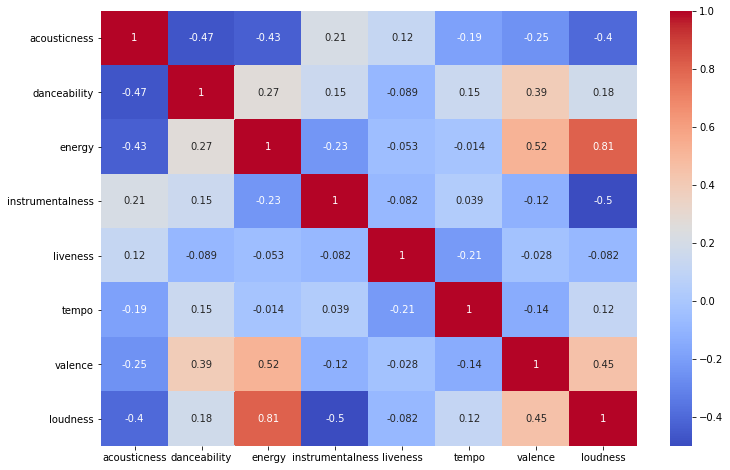

In [46]:
plot_correlation()

We can observe that there is a correlation between the loudness and the perceived energy of the song. The jointplots indicate a correlation between these two. Lets understand  how much one feature si impacted by another feature 

### Join plots

And for the features we again plotted a regression based joinplot. AS The multivariate normal distribution is a nice tool to demonstrate this type of plot and thus  it is sampling from a multidimensional Gaussian and there is natural clustering.
Here the line is  not close to flat because we chose our variables to be correlated.
So, in nutshell we had our eda as expected to be and it gave us the best features for a song to be at the top.

In [47]:
def create_joinplot(val1,val2,year,colr):
    sns.jointplot(val1,val2, data=year,kind='reg',color=colr)

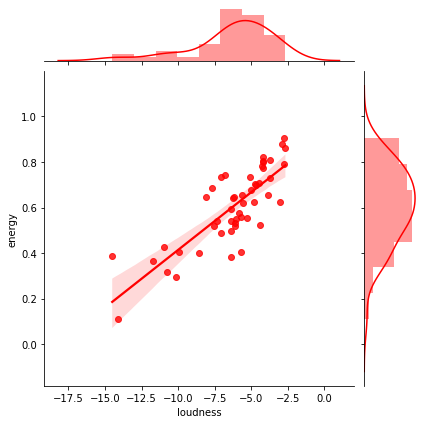

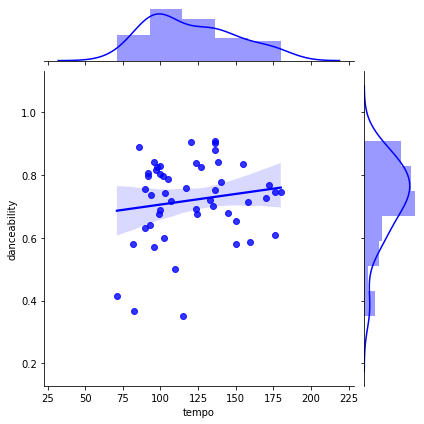

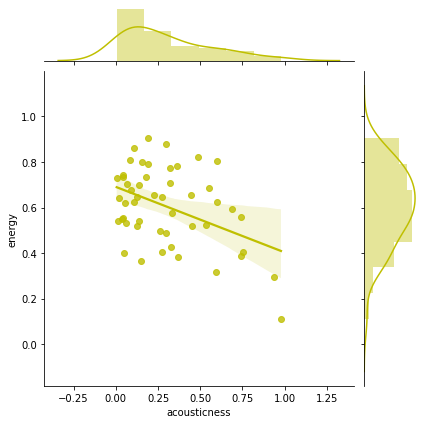

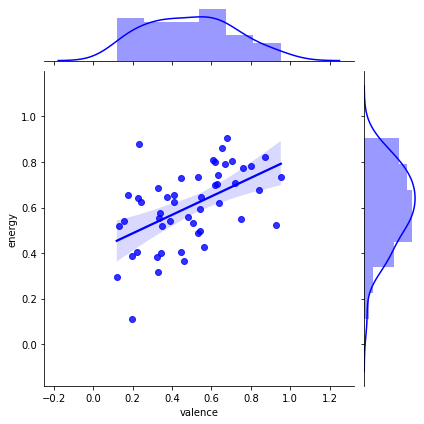

In [48]:

create_joinplot('loudness','energy',df,'r')
create_joinplot('tempo','danceability',df,'b')
create_joinplot('acousticness','energy',df,'y')
create_joinplot('valence','energy',df,'b')

from the corelation matrix we observe that  
- there is a relation between  tempo and dancebility 
- there is a relation between  acounsticeness and energy 
- there is a relation between  tempo and acousticeness
- there is a relation between  energy and loudness
- there is a relation between  tempo and valence
- there is a relation between  valence and dancebility 
- there is a relation between  valence and energy  

### dist plot for feature details 


In [49]:
def feature_details(feature):
    print("Mean value ", feature.mean())
    sns.distplot(feature,color="r")
    plt.show()


Mean value  0.7194000000000002


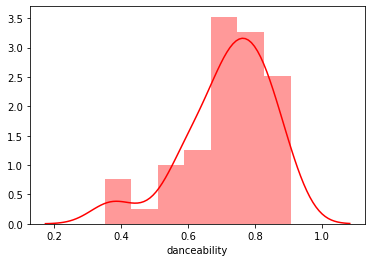

In [50]:
feature_details(df['danceability'])

*Conclusion*: top songs have high dancebility.And people listen to those songs in which they can dance.

Mean value  0.60462


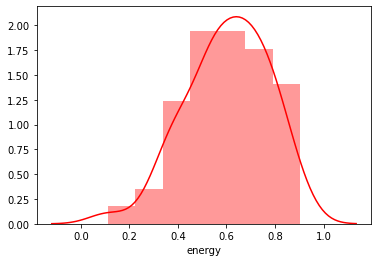

In [51]:
feature_details(df['energy'])

*Conclusion*:people like energetic songs 

Mean value  -6.22902


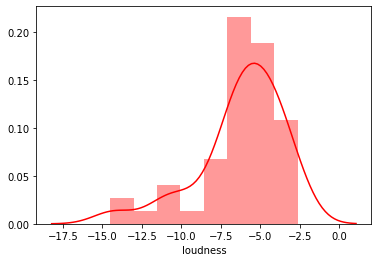

In [52]:
feature_details(df['loudness'])

*Conclusion*: more noice means more ranking 

Mean value  0.2993606


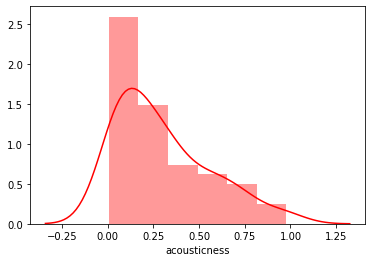

In [53]:
feature_details(df['acousticness'])

*Conclusion*:people don't lisen more to the acoustics 

Mean value  0.49042


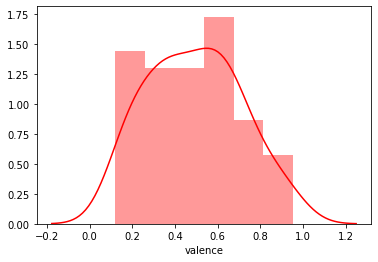

In [54]:
feature_details(df['valence'])

*Conclusion*:songs are evenly distributed and totally depends upon the mood 

Mean value  120.42562


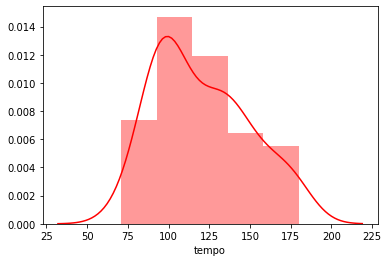

In [55]:
feature_details(df['tempo'])

In [56]:
# store mean values of above features
a=df['danceability'].mean()
b=df['energy'].mean()
c=df['loudness'].mean()
d=df['acousticness'].mean()
e=df['valence'].mean()
f=df['tempo'].mean()

*Conclusion*:people listen fast songs more 

### pca -important features 

In [57]:
def plot_pca_important_features():
    feture_to_plot = ["energy", "liveness", "tempo", "valence","danceability"]
    text1 = df["artists"] + " - " + df["name"]
    text2 = text1.values
    X = df[feture_to_plot].values
    y = df["danceability"].values
    min_maxscaler = MinMaxScaler()
    X = min_maxscaler.fit_transform(X)
    pca = PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)

    plot3d = go.Scatter3d(
        x=X[:,0],
        y=X[:,1],
        z=X[:,2],
        text=text2,
        mode="markers",
        marker=dict(
            size=8,
            color=y
        )
    )

    fig = go.Figure(data=[plot3d])
    py.iplot(fig, filename="3d graph-2nd")


In [58]:
plot_pca_important_features()

 # Create a popularity column

So, now if u see we crearted a new feature a.ka popularity adn did our comuputation to device if popularity is 1 or 0 for a song.And for better outcomes we have a graph here in which you an see the distribution of data around meen .For popularity 0 the distribution is scattereed  but for popularity 1 cateogary we have the danceability data around mean and not scaterred too much.Similarly we did comparisions for other featurees.

In [59]:
## #dance ,valence , energy , liveliness

def popularity_binary():
    if  'popularity'  not in df.columns:
         df["popularity"]=""
         df.loc[(df['danceability']>=a) | (df['energy']>=b)| (df['loudness']>=c)| (df['acousticness']>=d)| 
                        (df['valence']>=e)| (df['tempo']>=f),'popularity']='1'
         df.loc[(df['danceability']<a) & (df['energy']<b) & (df['loudness']<c),'popularity']='0'
         df.head()

         df.to_csv(new_dataframe_name,index=False)
           
    else:
        pass
        

In [60]:
popularity_binary()

In [61]:
df.head()

,id,name,popularity,track.track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artists,dancebility_new,tempo_rate
0,6v3KW9xbzN5yKLt9YKDYA2,SeÃ±orita,83,1,0.759,0.548,9,-6.049,0,0.0290,0.0392,0.00,0.0828,0.749,116.967,190800,4,Shawn Mendes,1,fast
1,2Fxmhks0bxGSBdJ92vM42m,bad guy,90,2,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.13,0.1000,0.562,135.128,194088,4,Billie Eilish,1,fast
2,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,83,12,0.755,0.522,2,-4.368,1,0.0575,0.5330,0.00,0.0685,0.925,89.960,157560,4,Post Malone,1,moderate
3,6ocbgoVGwYJhOv1GgI9NsF,7 rings,86,10,0.778,0.317,1,-10.732,0,0.3340,0.5920,0.00,0.0881,0.327,140.048,178627,4,Ariana Grande,1,fast
4,2YpeDb67231RjR0MgVLzsG,Old Town Road - Remix,85,1,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.00,0.1130,0.639,136.041,157067,4,Lil Nas X,1,fast


## correlation between features and popularity

In [62]:
def draw(year,compare_col,color):
    graph = sns.FacetGrid(df_new, col = "popularity")
    graph.map(sns.distplot, compare_col, bins = 25,color=color)
    return plt.show()

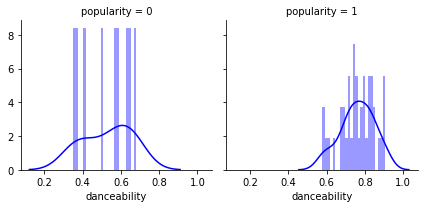

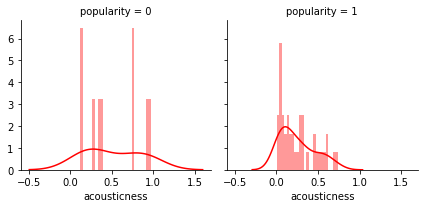

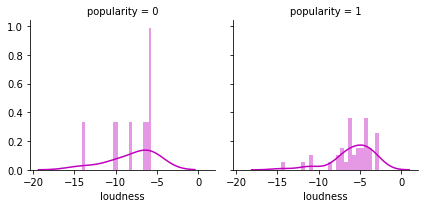

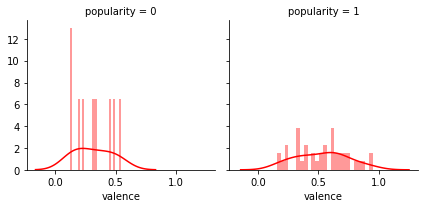

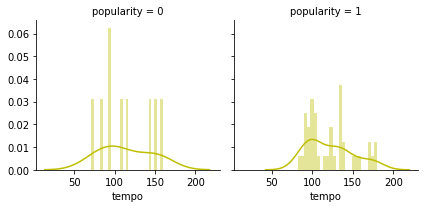

In [63]:
draw(df_new,"danceability","b")
draw(df_new,"acousticness","r")
draw(df_new,"loudness","m")
draw(df_new,"valence","r")
draw(df_new,"tempo","y")


In [64]:
def concat_name_popularity():
    popularity_data = pd.concat([df_new["name"],df_new["popularity"]],axis=1)
    return popularity_data.head()

In [65]:
concat_name_popularity()

,name,popularity
0,Señorita,1
1,bad guy,1
2,Sunflower - Spider-Man: Into the Spider-Verse,1
3,7 rings,1
4,Old Town Road - Remix,1


# calculating scores

## data preparation 

In [66]:
df_final=df_new.copy()

In [67]:

def drop():
    
    df_final.drop(["id","name","artists","tempo_rate","dancebility_new"],axis=1,inplace=True)
    return df_final.columns


In [68]:
drop()

Index(['popularity', 'track.track_number', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [69]:
def cateogarize_keys():
    global df_final
    df_final["key"] = df_final["key"].astype("category")
    df_final = pd.get_dummies(df_final, columns=["key"])
    return df_final.head()


In [70]:
cateogarize_keys()

,popularity,track.track_number,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_1,key_2,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,1,1,0.759,0.548,-6.049,0,0.0290,0.0392,0.00,0.0828,...,0,0,0,0,0,0,0,1,0,0
1,1,2,0.701,0.425,-10.965,1,0.3750,0.3280,0.13,0.1000,...,0,0,0,0,0,1,0,0,0,0
2,1,12,0.755,0.522,-4.368,1,0.0575,0.5330,0.00,0.0685,...,0,1,0,0,0,0,0,0,0,0
3,1,10,0.778,0.317,-10.732,0,0.3340,0.5920,0.00,0.0881,...,1,0,0,0,0,0,0,0,0,0
4,1,1,0.878,0.619,-5.560,1,0.1020,0.0533,0.00,0.1130,...,0,0,0,0,1,0,0,0,0,0


In [71]:
def cateogarize_time():
    global df_final
    df_final["time_signature"] = df_final["time_signature"].astype("category")
    df_final = pd.get_dummies(df_final, columns=["time_signature"])
    return df_final.head()

In [72]:
cateogarize_time()

,popularity,track.track_number,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_2,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_4
0,1,1,0.759,0.548,-6.049,0,0.0290,0.0392,0.00,0.0828,...,0,0,0,0,0,0,1,0,0,1
1,1,2,0.701,0.425,-10.965,1,0.3750,0.3280,0.13,0.1000,...,0,0,0,0,1,0,0,0,0,1
2,1,12,0.755,0.522,-4.368,1,0.0575,0.5330,0.00,0.0685,...,1,0,0,0,0,0,0,0,0,1
3,1,10,0.778,0.317,-10.732,0,0.3340,0.5920,0.00,0.0881,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0.878,0.619,-5.560,1,0.1020,0.0533,0.00,0.1130,...,0,0,0,1,0,0,0,0,0,1


In [73]:
# def change_datatype(var):
#     df_final[var] = df_final[var].astype(int)
    
# columns= ["key_1.0","key_2.0",
#          "key_3.0","key_4.0","key_5.0","key_6.0","key_7.0","key_8.0","key_9.0","key_10.0","key_11.0","time_signature_3.0","time_signature_4.0"]
# for column in columns:
#     change_datatype(column)
    

In [74]:
def load_data():
    
    y = df_final["popularity"].values
    X = df_final.drop(["popularity"],axis=1)
    return X,y
X,y =load_data()

feature_cols = X.columns.to_list()

*NOTE*:There is not a great  linear correlations in our data So, Decision Tree algorithms will give  better results as compared to linear regression models. Therefore using  Random Forest 
 

In [75]:

#x_data=X
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.6)
# X_train = X_train.T
# X_test = X_test.T
X_train=X_train[:None]
X_test=X_test[:None]
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


X_train:  (20, 24)
X_test:  (30, 24)
y_train:  (20,)
y_test:  (30,)


## xgb  top features -for validating  our  hypothesis

So after our popularity distributiona and 3d modelling based on pca.Now further we diecided to .Test if our hypothesis features as top ranking as per our eda  are similar
when compared to a very standard feature ranking algorithm like XGBoosting for feature engineering .And the outcome was we had our hypothesis prooved very accurate in terms of best features conributing for a song to  be in the top position. 

In [76]:
def plot_impfeature():
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    ax = plot_importance(xgb,color="r", height=0.15,
                         title='  Features Importance ', xlabel='Feature score', ylabel='Features',
                         importance_type='weight'
                        )

    return plt.show()




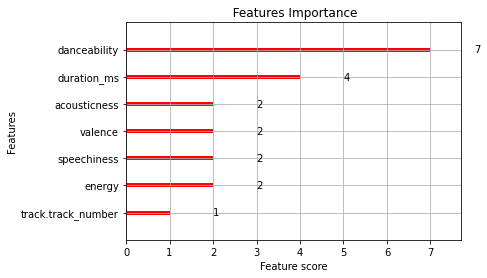

In [77]:
plot_impfeature()

##### The above graph assure that :
-  Our proposed ranked features turned out to be  most important for this data  
-  Example: we calculated features like :dancebility ,energy,loudness ets of most importance.And hence thus turned out true.

In [78]:
def calculate_scores():
    rf=RandomForestClassifier(random_state = 3)
    rf.fit(X_train,y_train)

    print("Train accuracy ",rf.score(X_train,y_train))
    print("Test accuracy ",rf.score(X_test,y_test))

    RandomForestClassifier_score=rf.score(X_test,y_test)
    y_pred=rf.predict(X_test)
    t_true=y_test

In [79]:
calculate_scores()

Train accuracy  1.0
Test accuracy  0.9666666666666667


# validating model 

## plot loudness t-SNE

In [80]:
def plot_pca_scaler(y,dataframe):
    features = ["energy", "liveness", "tempo", "valence", "loudness","danceability"]

    text1 = dataframe["artists"] + " - " + dataframe["name"]
    text2 = text1.values
    
    X = dataframe[features].values
    y = dataframe[y].values

    minmaxscaler = MinMaxScaler()
    X = minmaxscaler.fit_transform(X)

    print('t-SNE starting.................')
    tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(X)

    print('......................t-SNE done')

    fig = {
        "data": [
            {
                "x": tsne_results[:, 0],
                "y": tsne_results[:, 1],
                "text": text2,
                "mode": "markers",
                "marker": {"size": 8, "color": y}
            }
        ],
        "layout": {
            "xaxis": {"title": "x-tsne"},
            "yaxis": {"title": "y-tsne"}
        }
    }

    return py.iplot(fig, filename="amit")

In [81]:
plot_pca_scaler("loudness",df)

t-SNE starting.................
[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 0.646417
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.859016
[t-SNE] KL divergence after 300 iterations: 2.806260
......................t-SNE done


## project the 'top' and 'bottom' songs (or 'not-top' songs) 

project into the t-SNE space and see if they cluster differently.

1. separate the songs on the basis of popularity--> o and 1 , here 0  are the not top songs and 1 are top songs

- EXPECTED 1: Songs having popularity 1 should be tightly coupled  and 

- EXPECTED 2: Songs having popularity 0 should be loosely coupled  

In [82]:
def top_songs(dataframe):
    df1 = dataframe[dataframe['popularity'] == 1]
    return plot_pca_scaler("loudness",df1)

In [83]:
top_songs(df_new)

t-SNE starting.................
[t-SNE] Computing 40 nearest neighbors...
[t-SNE] Indexed 41 samples in 0.000s...
[t-SNE] Computed neighbors for 41 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 41 / 41
[t-SNE] Mean sigma: 10.921205
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.176224
[t-SNE] KL divergence after 300 iterations: 2.112491
......................t-SNE done


HENCE:assumption 1 prooved 

In [84]:
def not_top_songs(dataframe):
    df2 = dataframe[dataframe['popularity'] ==0 ]
    return plot_pca_scaler("loudness",df2)

In [85]:
not_top_songs(df_new)

t-SNE starting.................
[t-SNE] Computing 8 nearest neighbors...
[t-SNE] Indexed 9 samples in 0.000s...
[t-SNE] Computed neighbors for 9 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 9 / 9
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.768501
[t-SNE] KL divergence after 300 iterations: 1.180314
......................t-SNE done


HENCE:assumption 2 also prooved 